In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

df_train

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


In [3]:
df_train = df_train.drop('id', axis=1)

# EDA

In [4]:
# Counting Unique value and Missing value and embedding into one table for better understanding.

unique_count = []
for x in df_train.columns:
    unique_count.append([x, len(df_train[x].unique()), df_train[x].isnull().sum()])
pd.DataFrame(unique_count, columns=['Column', 'Unique', 'Missing']).set_index('Column')

,Unique,Missing
Column,,
Age,43,0
BusinessTravel,3,0
DailyRate,625,0
Department,3,0
DistanceFromHome,29,0
Education,6,0
EducationField,6,0
EmployeeCount,1,0
EnvironmentSatisfaction,4,0


In [5]:
cat_features = np.array([i for i in df_train.columns.tolist() if df_train[i].dtype == 'object'])
num_features = np.array([i for i in df_train.columns.tolist() if df_train[i].dtype != 'object'])

print("Number features column =" , len(num_features))
print("Categorial features column =" , len(cat_features))

Number features column = 26
Categorial features column = 8


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0
JobSatisfaction,1677.0,2.791890,1.097396,1.0,2.0,3.0,4.0,4.0


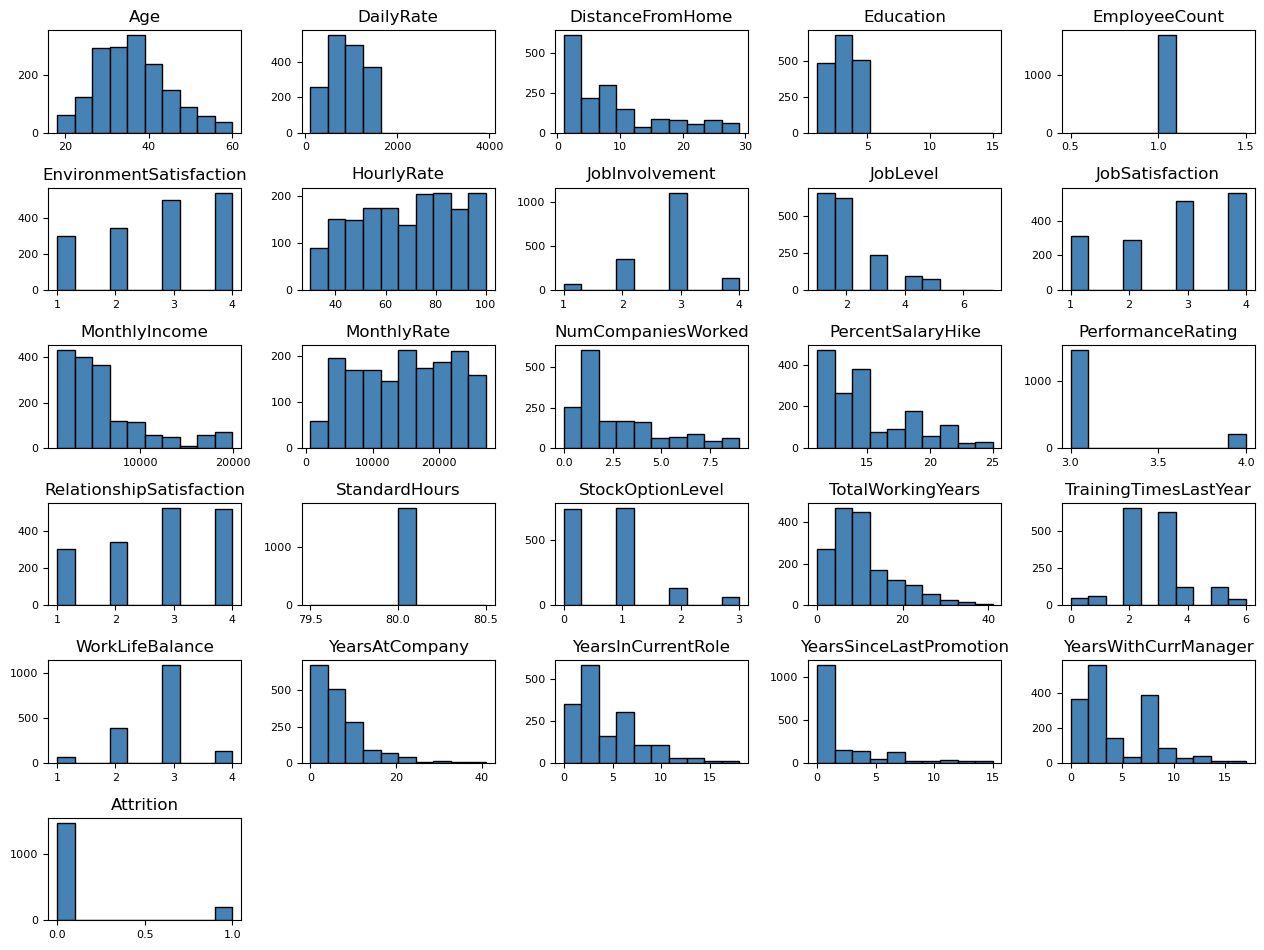

In [7]:
df_train.hist(bins=10, color='steelblue', 
           edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

In [8]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(['Attrition'], ascending=False, inplace=True)
corr.Attrition

Find most important features relative to target


/tmp/ipykernel_20/407194858.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


Attrition                   1.000000
NumCompaniesWorked          0.037127
DistanceFromHome            0.024741
PerformanceRating           0.013666
MonthlyRate                -0.005484
TrainingTimesLastYear      -0.018595
DailyRate                  -0.022380
PercentSalaryHike          -0.031571
HourlyRate                 -0.037280
YearsSinceLastPromotion    -0.038496
WorkLifeBalance            -0.045365
JobSatisfaction            -0.061010
Education                  -0.084305
RelationshipSatisfaction   -0.087537
EnvironmentSatisfaction    -0.092426
YearsWithCurrManager       -0.124712
MonthlyIncome              -0.126896
YearsAtCompany             -0.127120
YearsInCurrentRole         -0.133466
JobLevel                   -0.137238
TotalWorkingYears          -0.138740
JobInvolvement             -0.139929
Age                        -0.161044
StockOptionLevel           -0.194018
EmployeeCount                    NaN
StandardHours                    NaN
Name: Attrition, dtype: float64

<Axes: >

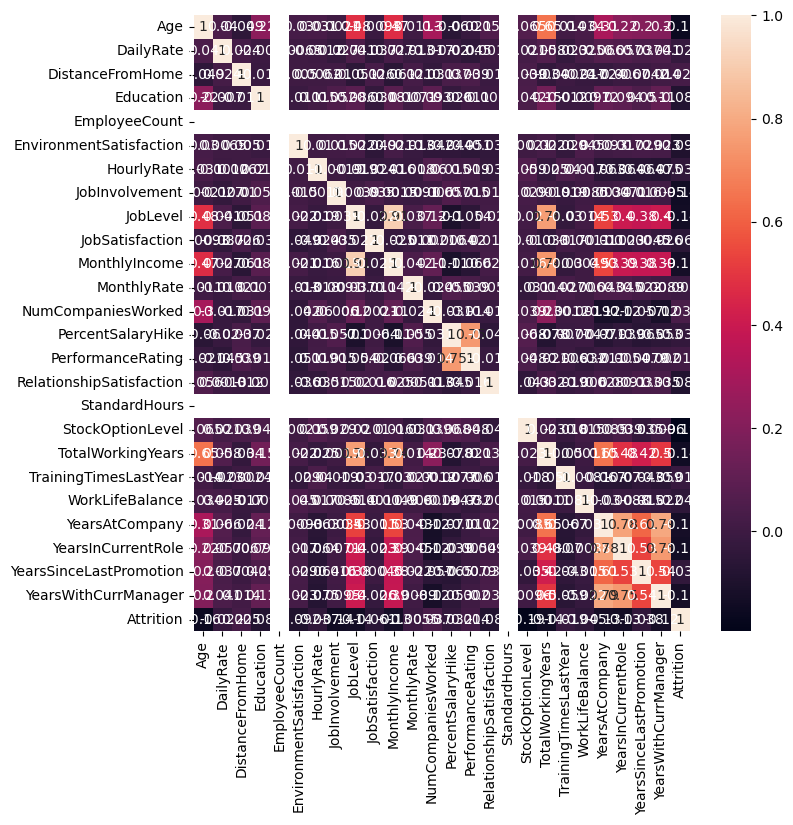

In [9]:
numcols = df_train[df_train.columns.intersection(num_features)]
plt.figure(figsize=(8,8))
sns.heatmap(numcols.corr(), annot=True)

In [10]:
name_type = {0: "Stayed", 1: "Left"}
df_train['Attrition_Category'] = df_train['Attrition'].map(name_type)
df_train['Attrition_Category'].value_counts()

Stayed    1477
Left       200
Name: Attrition_Category, dtype: int64

Attrition_Category  Left  Stayed
BusinessTravel                  
Travel_Rarely        144    1146
Travel_Frequently     51     210
Non-Travel             5     121
------------------------------------------------------------------------------------------------------------------------


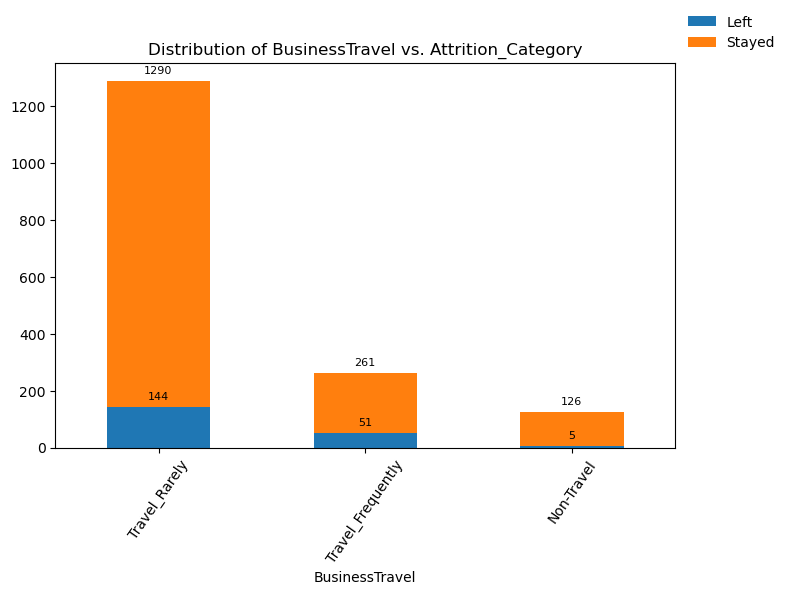

Attrition_Category      Left  Stayed
Department                          
Research & Development   126    1041
Sales                     67     404
Human Resources            7      32
------------------------------------------------------------------------------------------------------------------------


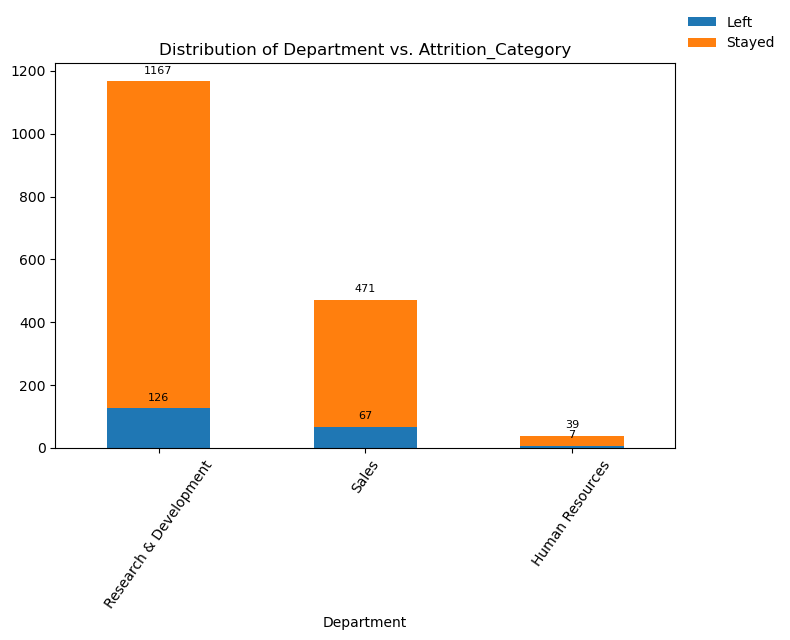

Attrition_Category  Left  Stayed
EducationField                  
Life Sciences         88     687
Medical               63     486
Marketing             26     126
Technical Degree      14      92
Other                  6      76
Human Resources        3      10
------------------------------------------------------------------------------------------------------------------------


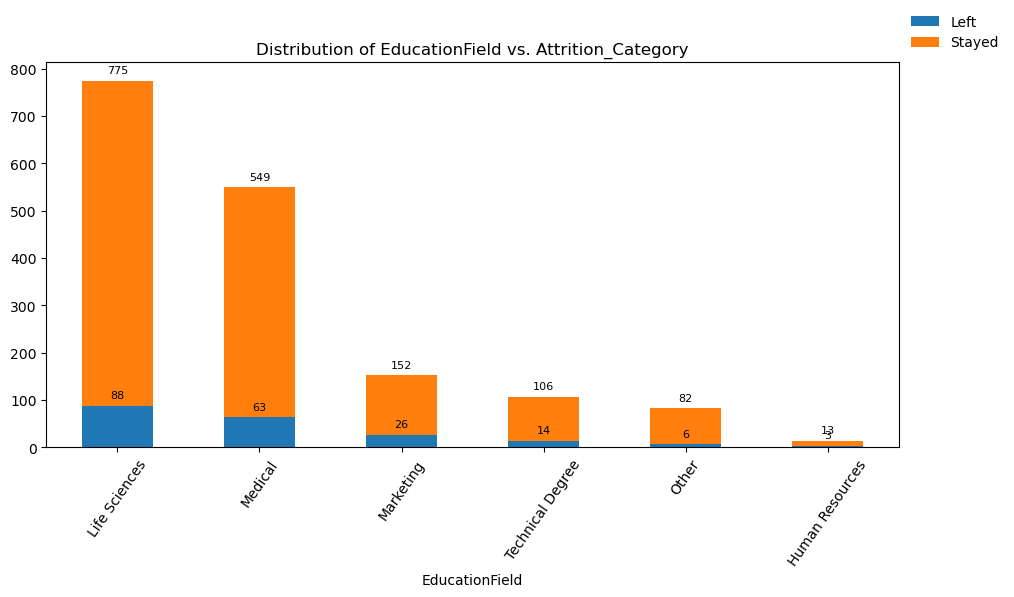

Attrition_Category  Left  Stayed
Gender                          
Male                 138     926
Female                62     551
------------------------------------------------------------------------------------------------------------------------


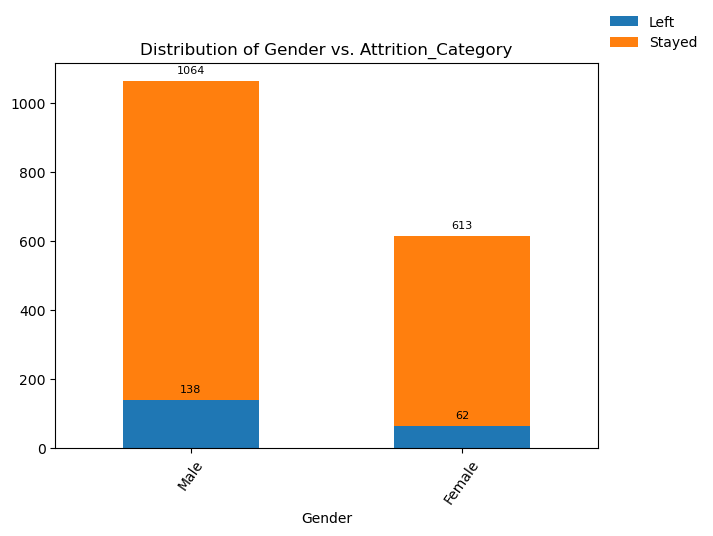

Attrition_Category         Left  Stayed
JobRole                                
Sales Executive              38     317
Research Scientist           42     302
Laboratory Technician        61     273
Manufacturing Director        5     191
Healthcare Representative    10     145
Manager                       9     102
Sales Representative         26      51
Research Director             2      69
Human Resources               7      27
------------------------------------------------------------------------------------------------------------------------


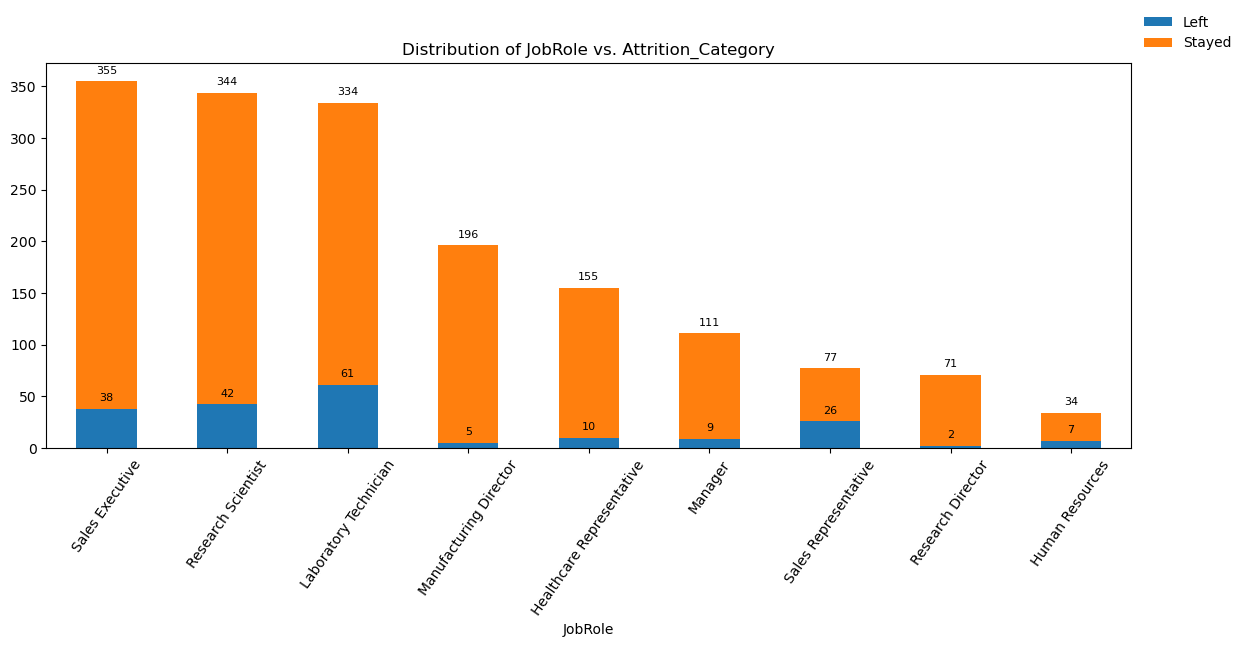

Attrition_Category  Left  Stayed
MaritalStatus                   
Married               70     703
Single               114     463
Divorced              16     311
------------------------------------------------------------------------------------------------------------------------


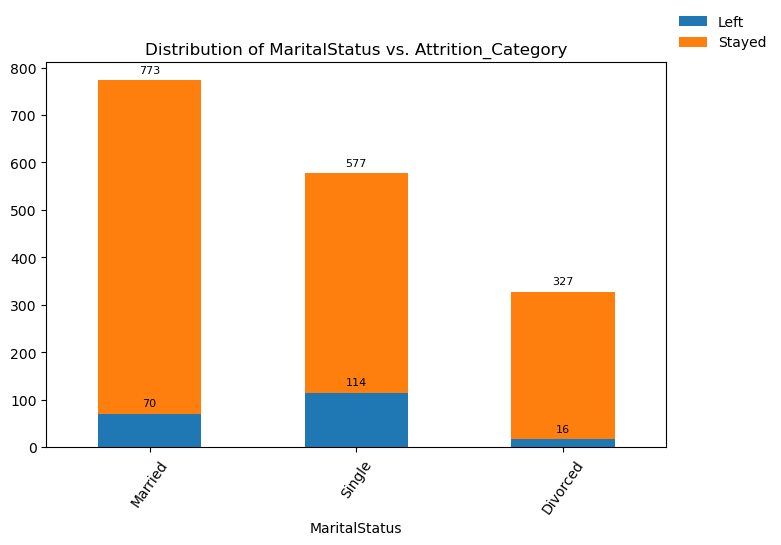

Attrition_Category  Left  Stayed
Over18                          
Y                    200    1477
------------------------------------------------------------------------------------------------------------------------


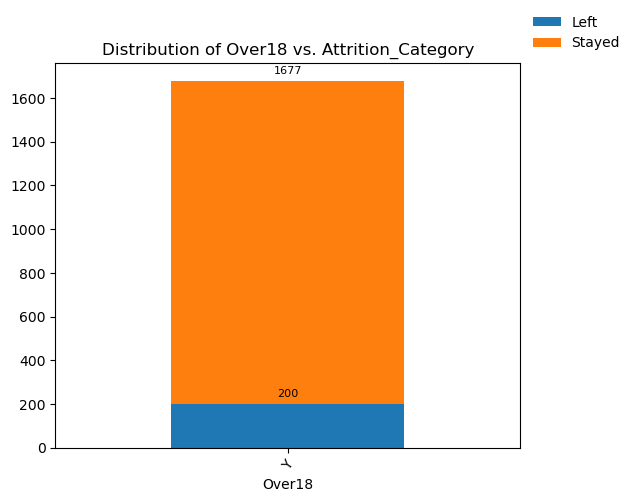

Attrition_Category  Left  Stayed
OverTime                        
No                   112    1165
Yes                   88     312
------------------------------------------------------------------------------------------------------------------------


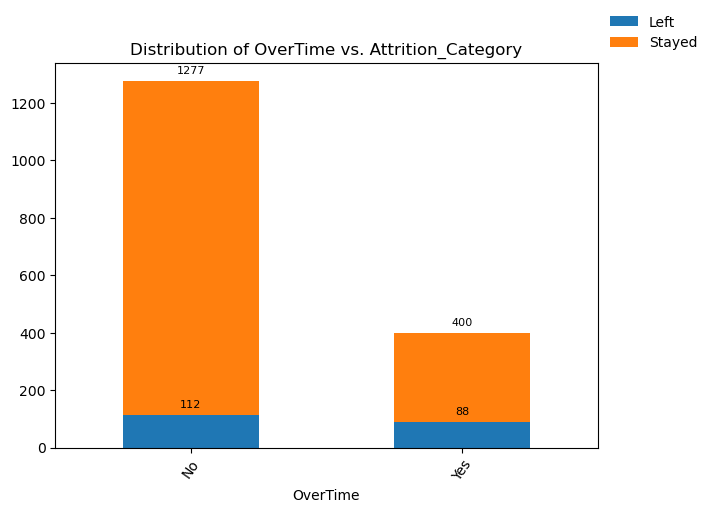

In [11]:
for feature in cat_features:
    count = len(df_train[feature].unique())
    crosstab = pd.crosstab(df_train[feature], df_train['Attrition_Category'])
    sorter = crosstab.sum(axis=1).sort_values(ascending=False).index
    crosstab = crosstab.loc[sorter]
    print(crosstab)
    print("-" * 120)
    ax = crosstab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    ax.legend(loc="lower left", frameon=False, bbox_to_anchor=(1, 1))
    ax.set_title("Distribution of {} vs. {}".format(feature, 'Attrition_Category'))
    plt.xticks(rotation=55)
    ax.set_xlabel(feature)
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=8, padding=4)
    plt.show()

In [12]:
def calculate_rate(df, col_1, col_2, val_1, val_2):
    total_count = len(df)
    
    cat_1 = df.loc[df[col_1] == val_1, col_2].value_counts()
    cat_rate_1 = (cat_1 / total_count) * 100

    cat_2 = df.loc[df[col_1] == val_2, col_2].value_counts()
    cat_rate_2 = (cat_2 / total_count) * 100

    rate = pd.concat([cat_1, cat_2], axis=1).fillna(0)
    rate.columns = [val_1, val_2]
    rate['Total'] = rate.sum(axis=1)
    rate[val_1 + '_Rate'] = ((rate[val_1] / rate['Total']) * 100).round(2)
    rate[val_2 + '_Rate'] = ((rate[val_2] / rate['Total']) * 100).round(2)
    
    return rate

In [13]:
attrition_rates_by_department = calculate_rate(df_train, 'Attrition_Category', 'Department', 'Stayed', 'Left')
attrition_rates_by_department

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Research & Development,1041,126,1167,89.20,10.80
Sales,404,67,471,85.77,14.23
Human Resources,32,7,39,82.05,17.95


In [14]:
attrition_rates_by_job_role = calculate_rate(df_train, 'Attrition_Category', 'JobRole', 'Stayed', 'Left')
attrition_rates_by_job_role

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Sales Executive,317,38,355,89.30,10.70
Research Scientist,302,42,344,87.79,12.21
Laboratory Technician,273,61,334,81.74,18.26
Manufacturing Director,191,5,196,97.45,2.55
Healthcare Representative,145,10,155,93.55,6.45
Manager,102,9,111,91.89,8.11
Research Director,69,2,71,97.18,2.82
Sales Representative,51,26,77,66.23,33.77
Human Resources,27,7,34,79.41,20.59


In [15]:
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')], 
                       labels=['Teenage', 'Young Adult', 
                               'Adult', 'Middle Aged', 'Senior', 'Elderly'])

In [16]:
attrition_rates_by_age_group = calculate_rate(df_train, 'Attrition_Category', 'AgeGroup', 'Stayed', 'Left')
attrition_rates_by_age_group


,Stayed,Left,Total,Stayed_Rate,Left_Rate
Adult,684,80,764,89.53,10.47
Young Adult,363,82,445,81.57,18.43
Middle Aged,311,19,330,94.24,5.76
Senior,99,8,107,92.52,7.48
Teenage,20,11,31,64.52,35.48
Elderly,0,0,0,NaN,NaN


In [17]:
df_train['JobLevelCategory'] = df_train['JobLevel'].apply(lambda x:
    'Entry' if x == 1 else
    'Junior' if x == 2 else
    'Intermediate' if x == 3 else
    'Mid-Senior' if x == 4 else
    'Senior' if x == 5 else
    'Lead' if x == 6 else
    'Principal' if x == 7 else
    'Invalid'
)

In [18]:
attrition_rates_by_JobLevel = calculate_rate(df_train, 'Attrition_Category', 'JobLevelCategory', 'Stayed', 'Left')
attrition_rates_by_JobLevel

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Junior,575,42.0,617.0,93.19,6.81
Entry,528,127.0,655.0,80.61,19.39
Intermediate,214,21.0,235.0,91.06,8.94
Mid-Senior,89,5.0,94.0,94.68,5.32
Senior,70,5.0,75.0,93.33,6.67
Principal,1,0.0,1.0,100.00,0.00


In [19]:
average_monthly_income_by_department = (
    df_train.groupby('Department')['MonthlyIncome'].mean().reset_index(name='AverageMonthlyIncomeByDepartment')
)
average_monthly_income_by_department

,Department,AverageMonthlyIncomeByDepartment
0,Human Resources,6156.461538
1,Research & Development,5883.513282
2,Sales,6973.700637


In [20]:
average_monthly_income_by_gender = (
    df_train.groupby('Gender')['MonthlyIncome'].mean().reset_index(name='AverageMonthlyIncomeByGender')
)
average_monthly_income_by_gender

,Gender,AverageMonthlyIncomeByGender
0,Female,6540.561175
1,Male,5997.566729


In [21]:
percentage_high_job_satisfaction = (
    (df_train['JobSatisfaction'] >= 4).sum() / len(df_train)
) * 100
percentage_high_job_satisfaction

33.452593917710196

In [22]:
average_years_since_last_promotion_by_hourly_rate = (
    df_train.groupby('JobRole')['HourlyRate'].mean().reset_index(name='AverageYearsSinceLastPromotionByHourlyRate')
) 
average_years_since_last_promotion_by_hourly_rate

,JobRole,AverageYearsSinceLastPromotionByHourlyRate
0,Healthcare Representative,67.096774
1,Human Resources,67.882353
2,Laboratory Technician,67.443114
3,Manager,65.810811
4,Manufacturing Director,67.617347
5,Research Director,68.873239
6,Research Scientist,68.776163
7,Sales Executive,67.873239
8,Sales Representative,68.337662


# T-Test

In [23]:
from scipy.stats import ttest_ind

laboratory_technician = df_train[df_train['JobRole'] == 'Laboratory Technician']['MonthlyIncome']
sales_executive = df_train[df_train['JobRole'] == 'Sales Executive']['MonthlyIncome']

t_stat, p_value = ttest_ind(laboratory_technician, sales_executive)
if p_value < 0.05:
    print("=" * 50)
    print("There is a significant difference in compensation between Laboratory Technician and Sales Executive Job Role.")
    print("=" * 50)
else:
    print("=" * 50)
    print("There is no significant difference in compensation between Laboratory Technician and Sales Executive Job Role.")
    print("=" * 50)

There is a significant difference in compensation between Laboratory Technician and Sales Executive Job Role.


In [24]:
hr = df_train[df_train['Department'] == 'Laboratory Technician']['MonthlyIncome']
sales = df_train[df_train['Department'] == 'Sales Executive']['MonthlyIncome']

t_stat, p_value = ttest_ind(hr, sales)
if p_value < 0.05:
    print("=" * 50)
    print("There is a significant difference in compensation between HR and Sales Department.")
    print("=" * 50)
else:
    print("=" * 50)
    print("There is no significant difference in compensation between HR and Sales Department.")
    print("=" * 50)

There is no significant difference in compensation between HR and Sales Department.


In [25]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe,columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

In [26]:
outlier_thresholds(df_train, num_features)

(Age                            13.5
 DailyRate                    -362.0
 DistanceFromHome              -13.0
 Education                      -1.0
 EmployeeCount                   1.0
 EnvironmentSatisfaction        -1.0
 HourlyRate                      1.5
 JobInvolvement                  0.5
 JobLevel                       -0.5
 JobSatisfaction                -1.0
 MonthlyIncome               -3917.0
 MonthlyRate                -10212.5
 NumCompaniesWorked             -3.5
 PercentSalaryHike               4.5
 PerformanceRating               3.0
 RelationshipSatisfaction       -1.0
 StandardHours                  80.0
 StockOptionLevel               -1.5
 TotalWorkingYears              -6.0
 TrainingTimesLastYear           0.5
 WorkLifeBalance                 0.5
 YearsAtCompany                 -6.0
 YearsInCurrentRole             -5.5
 YearsSinceLastPromotion        -3.0
 YearsWithCurrManager           -5.5
 Attrition                       0.0
 dtype: float64,
 Age                 

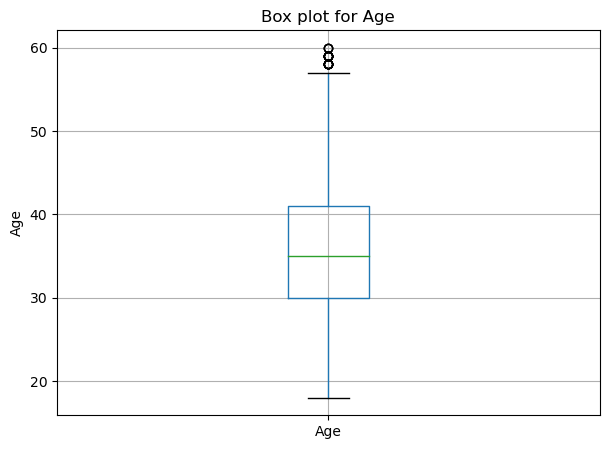

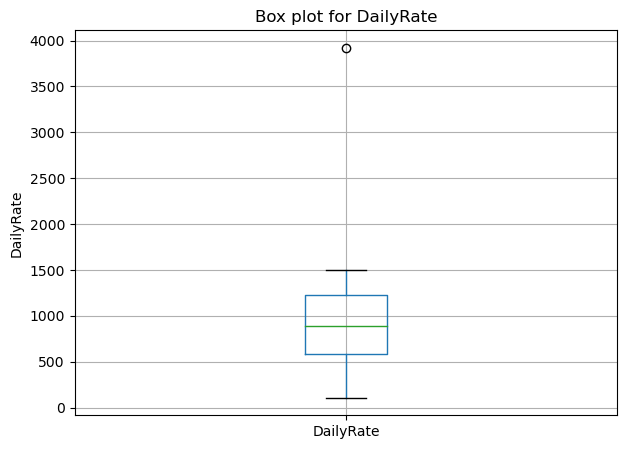

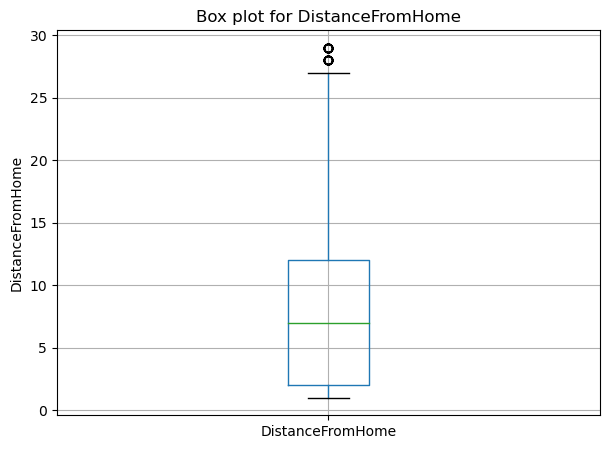

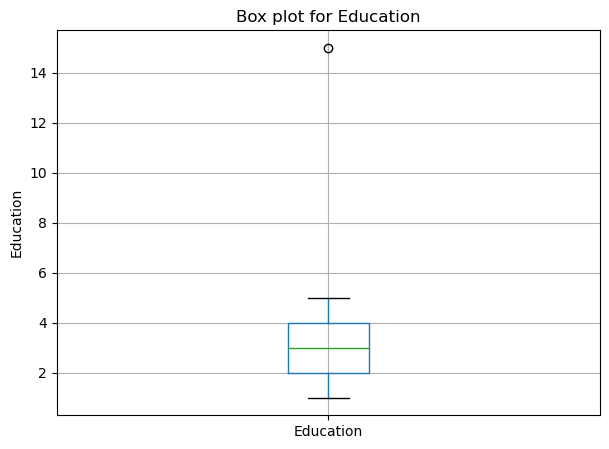

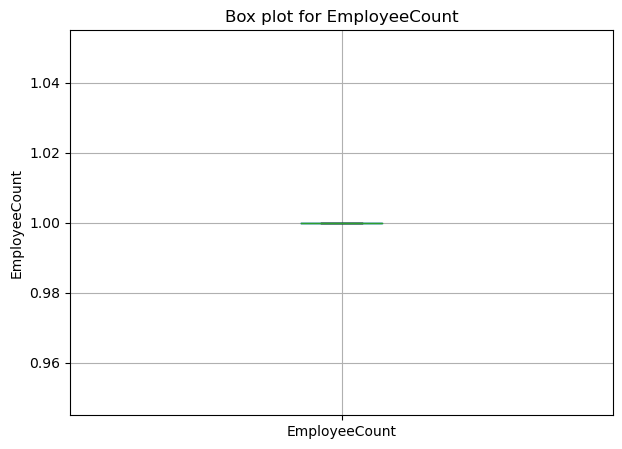

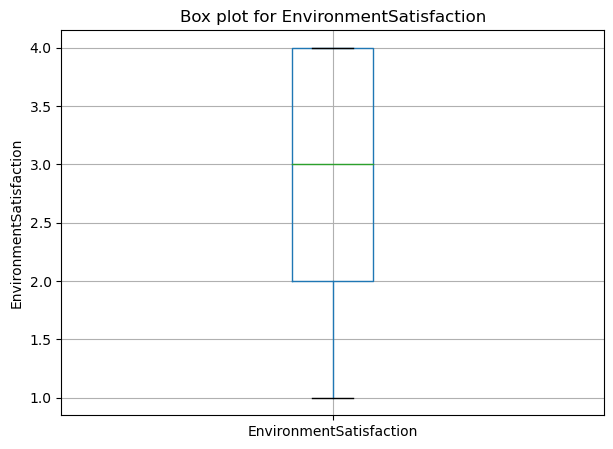

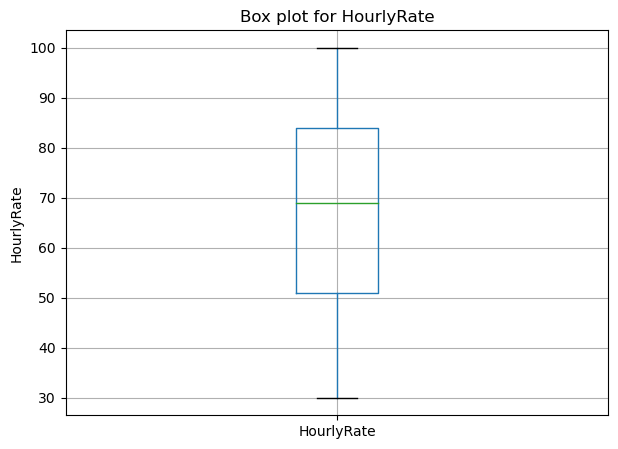

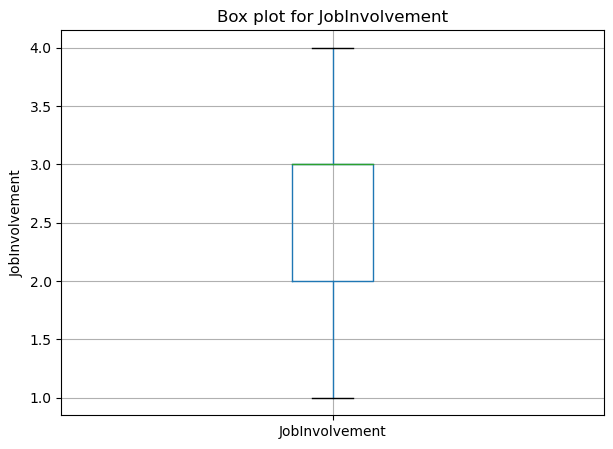

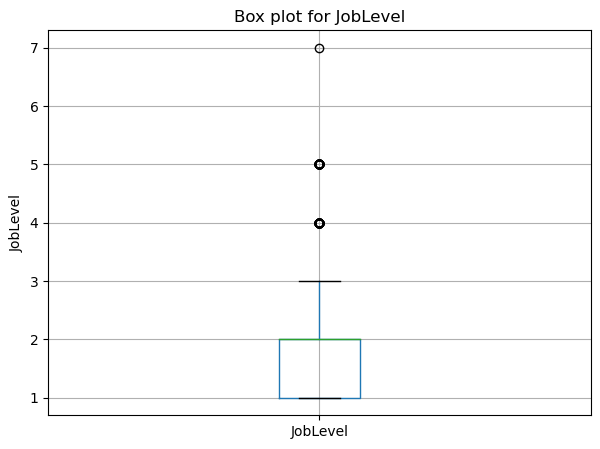

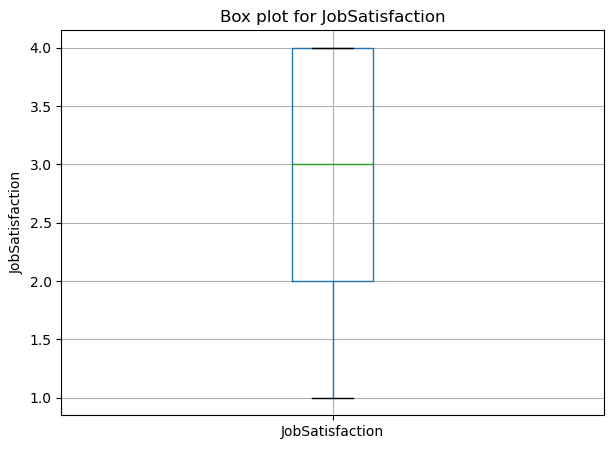

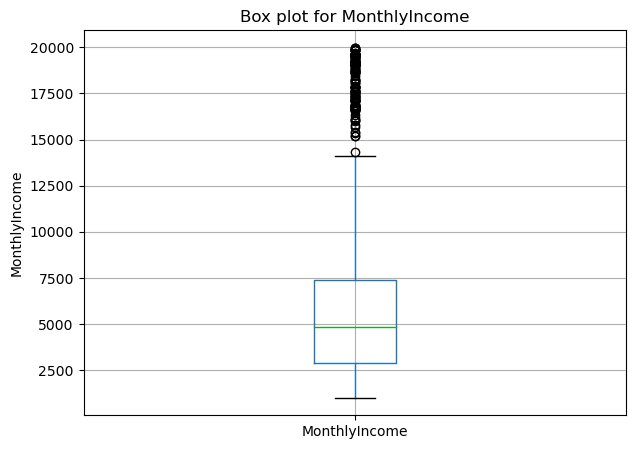

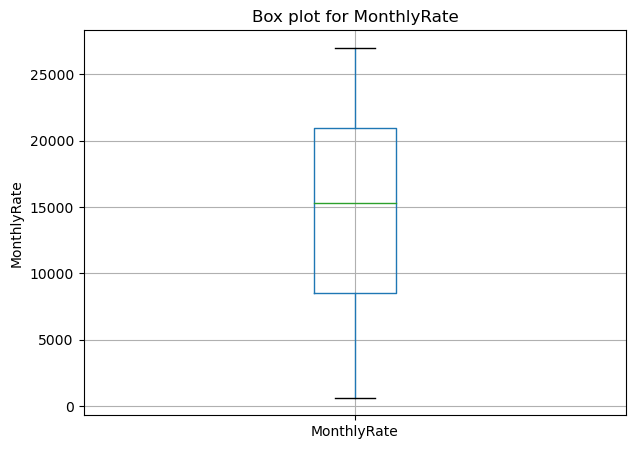

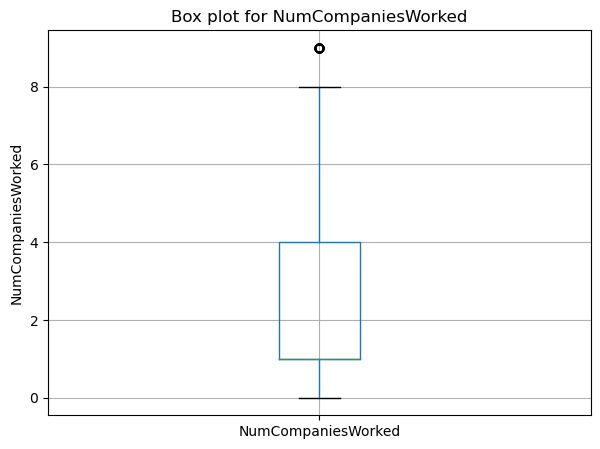

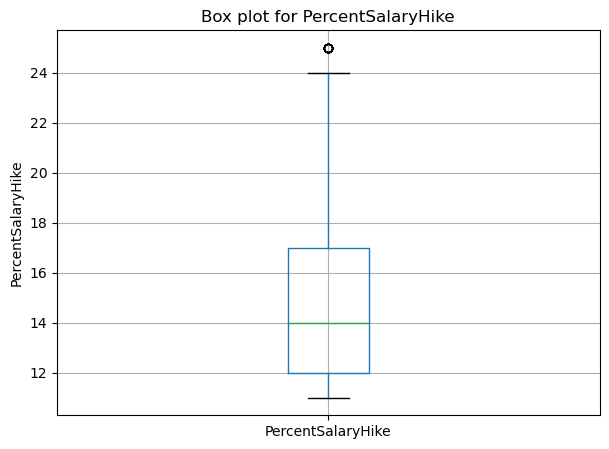

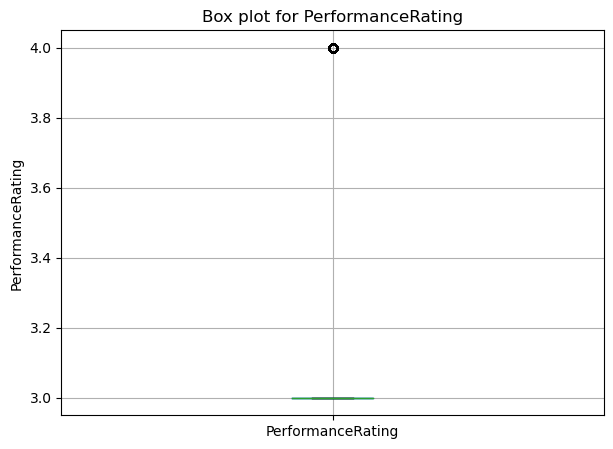

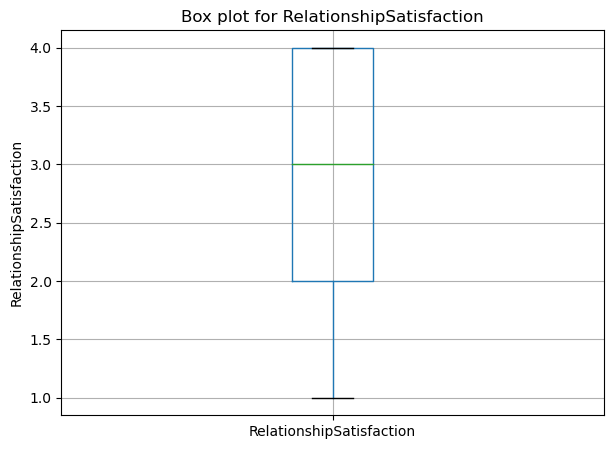

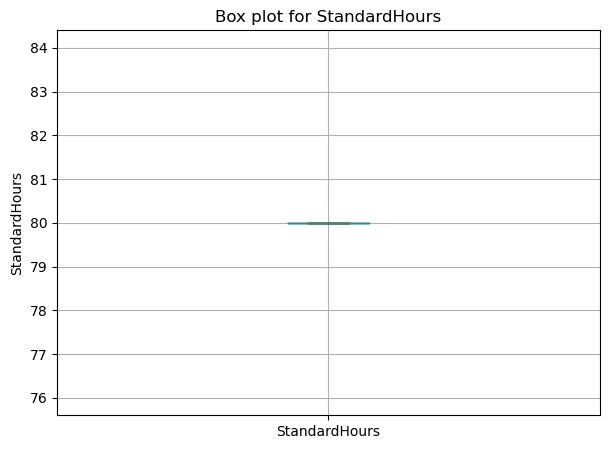

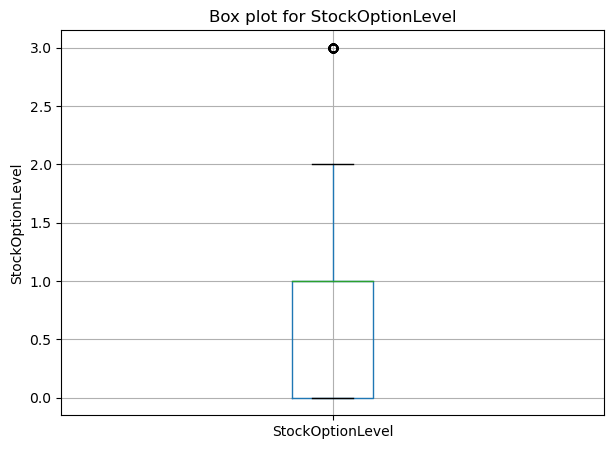

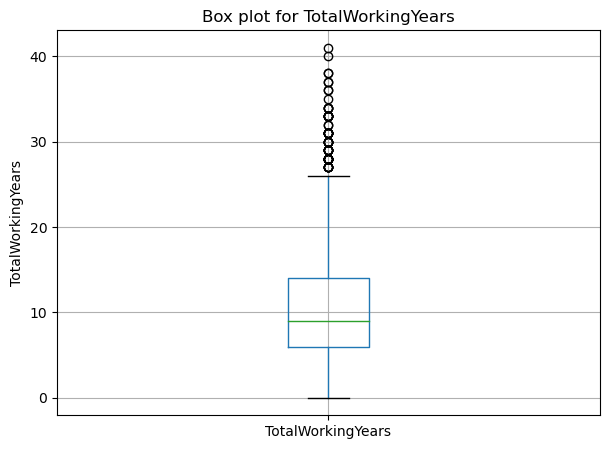

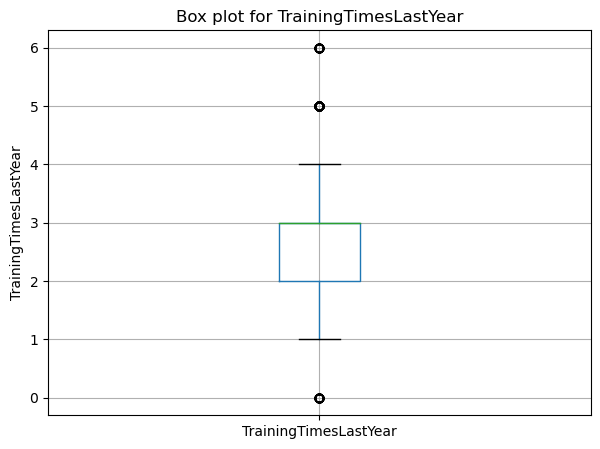

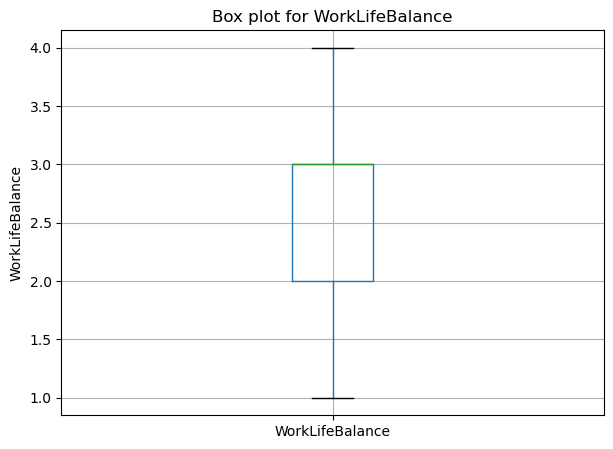

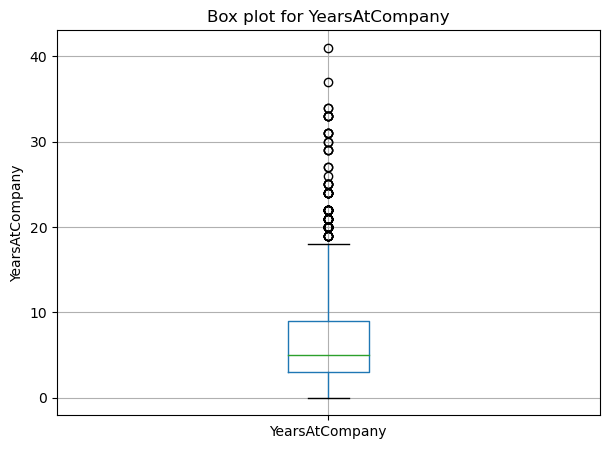

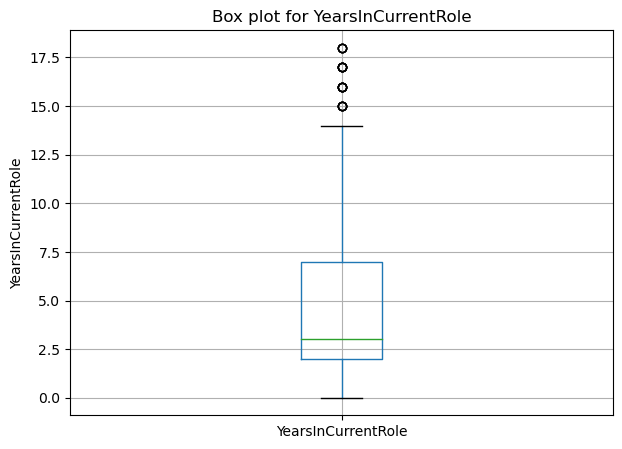

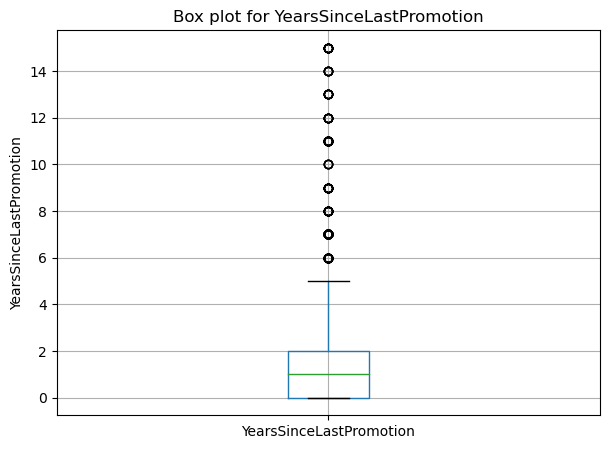

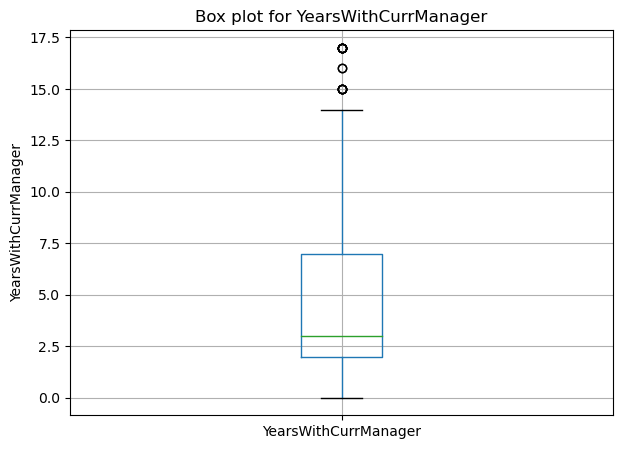

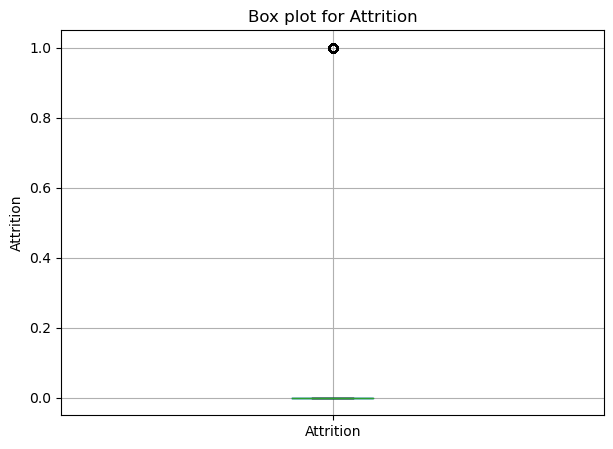

In [27]:
for col in df_train.describe().columns:
    if col in df_train.columns:
        fig = plt.figure(figsize=(7, 5))
        ax = fig.gca()
        df_train.boxplot(column=col, ax=ax)
        ax.set_ylabel(col)
        plt.title("Box plot for {}".format(col))
        plt.show()

## Remove Outliers

In [28]:
cols_outliers = ['MonthlyRate',
'MonthlyIncome',
'NumCompaniesWorked',
'StockOptionLevel',
'TotalWorkingYears',
'YearsAtCompany',
'YearsSinceLastPromotion',
'YearsWithCurrManager']

replace_with_thresholds(df_train,df_train[cols_outliers])

## Drop unimportant columns

In [29]:
columns_to_drop = ['Attrition_Category']
if 'Attrition_Category'in columns_to_drop:
    df_train.drop(columns_to_drop, axis=1, inplace=True)

In [30]:
columns_to_drop = ['Over18']
if 'Over18'in columns_to_drop:
    df_train.drop(columns_to_drop, axis=1, inplace=True)

In [31]:
columns_to_drop = ['AgeGroup']
if 'AgeGroup'in columns_to_drop:
    df_train.drop(columns_to_drop, axis=1, inplace=True)

In [32]:
columns_to_drop = ['JobLevelCategory']
if 'JobLevelCategory'in columns_to_drop:
    df_train.drop(columns_to_drop, axis=1, inplace=True)

# Pre-processing: Feature selection/extraction

In [33]:
cat_features = np.array([i for i in df_train.columns.tolist() if df_train[i].dtype == 'object'])
num_features = np.array([i for i in df_train.columns.tolist() if df_train[i].dtype != 'object'])

In [34]:
cat_features

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'], dtype='<U14')

In [35]:
num_features

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='<U24')

## Encoding and Normalize Data

In [36]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label Encoding for categorical features
le = LabelEncoder()
for feature in cat_features:
    df_train[feature] = le.fit_transform(df_train[feature])

# Min-Max Scaling for numerical features
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = MinMaxScaler()
df_train[features] = scaler.fit_transform(df_train[features])

In [37]:
X = df_train.drop(['Attrition'], axis=1)
y = df_train['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X,y)

y_pred = logr.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy: {round(acc,3)}")

Accuracy: 0.864


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       364
           1       0.45      0.09      0.15        56

    accuracy                           0.86       420
   macro avg       0.66      0.54      0.54       420
weighted avg       0.82      0.86      0.82       420

Confusion matrix, without normalization
[[358   6]
 [ 51   5]]


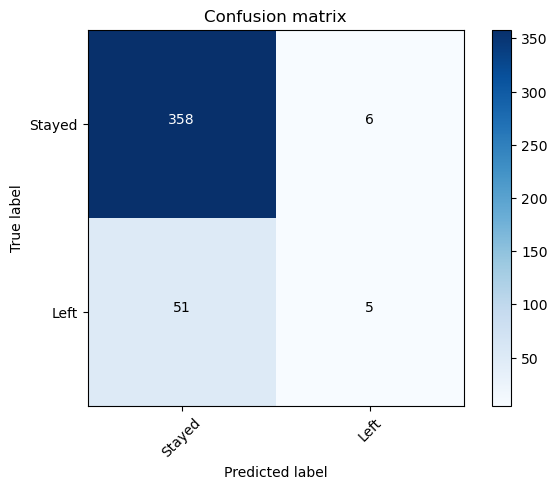

In [40]:
from sklearn.metrics import classification_report, confusion_matrix


cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Stayed','Left'],normalize= False,  title='Confusion matrix')

# XGB Classifier

In [41]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
xgb_clf = xgb.XGBClassifier(**params)
xgb_clf.fit(X,y)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9642857142857143


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       364
           1       1.00      0.73      0.85        56

    accuracy                           0.96       420
   macro avg       0.98      0.87      0.91       420
weighted avg       0.97      0.96      0.96       420

Confusion matrix, without normalization
[[364   0]
 [ 15  41]]


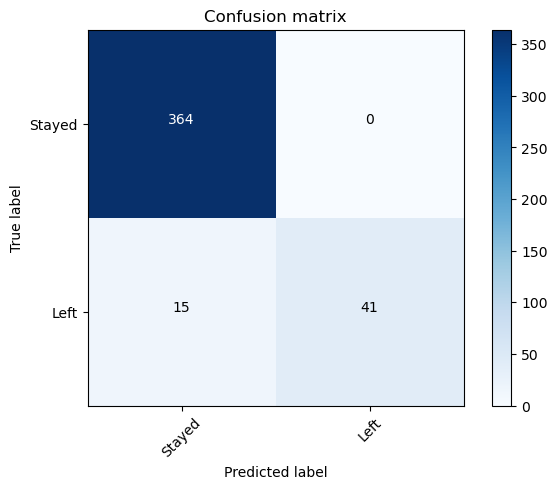

In [42]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Stayed','Left'],normalize= False,  title='Confusion matrix')

In [43]:
importances = xgb_clf.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
24,StockOptionLevel,0.077066
21,PerformanceRating,0.061631
19,OverTime,0.051407
16,MonthlyIncome,0.043468
11,JobInvolvement,0.040918
15,MaritalStatus,0.039097
28,YearsAtCompany,0.038331
29,YearsInCurrentRole,0.034557
1,BusinessTravel,0.033862
0,Age,0.032654


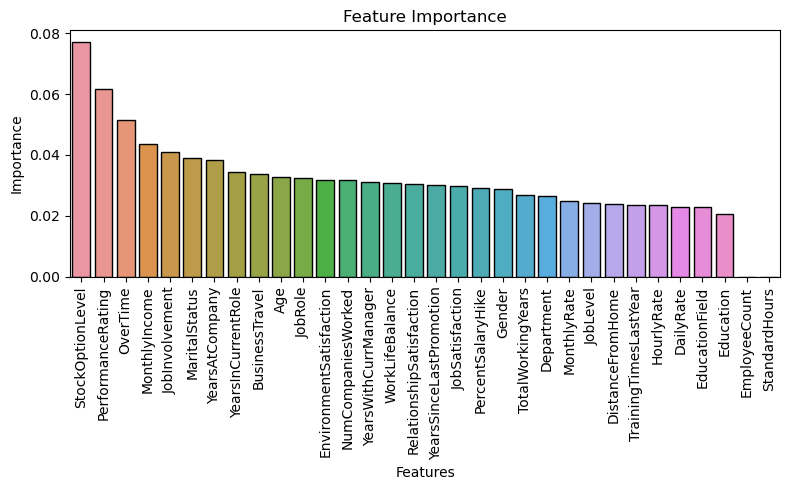

In [44]:
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(8,5))
sns.barplot(x = list(range(len(X.columns))), y= importances[indices], edgecolor='black')
plt.xticks(range(len(X.columns)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [45]:
# rf_clf = RandomForestClassifier(n_estimators=50, random_state=123)
# rf_clf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
rf_clf = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth = 10)

rf_clf.fit(X,y)

y_pred = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X, y, cv=5)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Accuracy: 0.9785714285714285
Cross-validation scores: [0.89 0.88 0.88 0.87 0.89]
Mean score: 0.8825266524520256
Standard deviation: 0.00556127225197307


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       364
           1       1.00      0.84      0.91        56

    accuracy                           0.98       420
   macro avg       0.99      0.92      0.95       420
weighted avg       0.98      0.98      0.98       420

Confusion matrix, without normalization
[[364   0]
 [  9  47]]


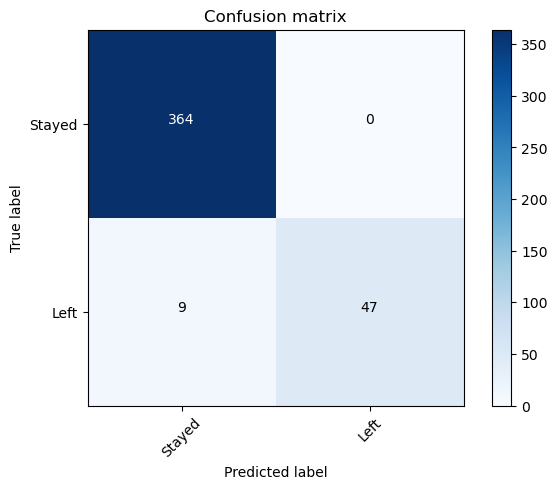

In [47]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Stayed','Left'],normalize= False,  title='Confusion matrix')

In [48]:
importances = rf_clf.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
16,MonthlyIncome,0.083045
0,Age,0.056775
17,MonthlyRate,0.056519
24,StockOptionLevel,0.053986
2,DailyRate,0.051606
25,TotalWorkingYears,0.046359
10,HourlyRate,0.046241
28,YearsAtCompany,0.042603
20,PercentSalaryHike,0.042566
19,OverTime,0.039089


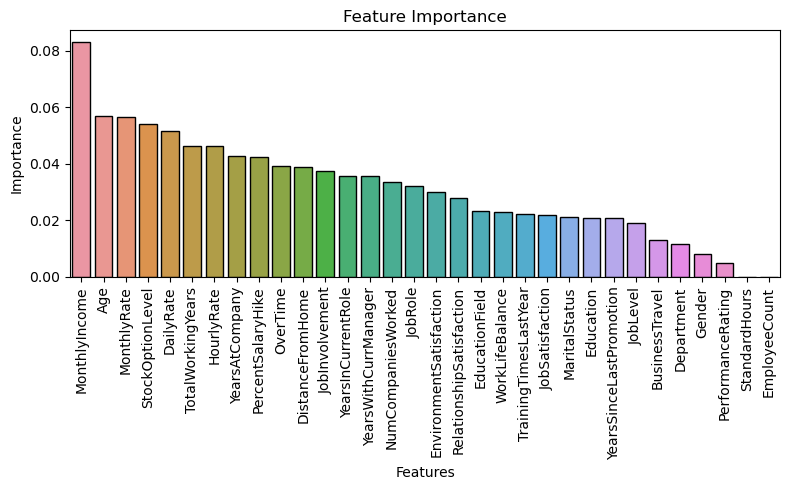

In [49]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(8,5))
sns.barplot(x = list(range(len(X.columns))), y= importances[indices], edgecolor='black')
plt.xticks(range(len(X.columns)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [50]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Train test data set

In [51]:
df_test = pd.read_csv('data/test.csv')
X_test = df_test.copy()

In [52]:
columns_to_drop = ['Over18']
X_test.drop(columns=columns_to_drop, inplace=True)

In [53]:
le = LabelEncoder()

cat_features_test = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
'JobRole', 'MaritalStatus', 'OverTime']

for feature in cat_features_test:
    X_test[feature] = le.fit_transform(X_test[feature])

In [54]:
features_test = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'Education','EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = MinMaxScaler()
X_test[features_test] = scaler.fit_transform(X_test[features_test])

In [55]:
test_ids = X_test.pop('id')

y_pred = rf_clf.predict(X_test)
submission = pd.DataFrame({'id': test_ids, 'Attrition': y_pred})
submission.to_csv('data/submission.csv', index=False)
submission = pd.read_csv('data/submission.csv')

In [56]:
submission.head()

,id,Attrition
0,1677,0
1,1678,0
2,1679,0
3,1680,0
4,1681,0


In [57]:
# merge the two dataframes using the merge method
result = pd.merge(df_test, submission, on='id')

In [58]:
result.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,80,0,1,2,2,1,0,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,80,1,7,3,3,2,2,2,2,0
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,80,2,13,2,2,7,7,1,7,0
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,80,0,14,2,2,14,10,11,8,0
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,80,0,1,5,3,1,0,0,0,0


In [59]:
result.to_csv('data/model_result_df.csv', index=False)

In [60]:
name_type = {0: "Stayed", 1: "Left"}
result['Attrition_Category'] = result['Attrition'].map(name_type)
result['Attrition_Category'].value_counts()

Stayed    1077
Left        42
Name: Attrition_Category, dtype: int64

In [61]:
result.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Attrition_Category'],
      dtype='object')

In [62]:
attrition_rates_by_department = calculate_rate(result, 'Attrition_Category', 'Department', 'Stayed', 'Left')
attrition_rates_by_department

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Research & Development,749,28,777,96.40,3.60
Sales,296,10,306,96.73,3.27
Human Resources,32,4,36,88.89,11.11


In [63]:
attrition_rates_by_JobRole = calculate_rate(result, 'Attrition_Category', 'JobRole', 'Stayed', 'Left')
attrition_rates_by_JobRole

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Sales Executive,237,3.0,240.0,98.75,1.25
Research Scientist,222,8.0,230.0,96.52,3.48
Laboratory Technician,210,20.0,230.0,91.30,8.70
Manufacturing Director,117,0.0,117.0,100.00,0.00
Healthcare Representative,112,0.0,112.0,100.00,0.00
Manager,71,0.0,71.0,100.00,0.00
Research Director,46,0.0,46.0,100.00,0.00
Sales Representative,37,7.0,44.0,84.09,15.91
Human Resources,25,4.0,29.0,86.21,13.79


In [64]:
result['AgeGroup'] = pd.cut(result['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')], 
                       labels=['Teenage', 'Young Adult', 
                               'Adult', 'Middle Aged', 'Senior', 'Elderly'])

In [65]:
attrition_rates_by_age_group = calculate_rate(result, 'Attrition_Category', 'AgeGroup', 'Stayed', 'Left')
attrition_rates_by_age_group

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Adult,496,6,502,98.80,1.20
Young Adult,268,22,290,92.41,7.59
Middle Aged,220,0,220,100.00,0.00
Senior,84,2,86,97.67,2.33
Teenage,9,12,21,42.86,57.14
Elderly,0,0,0,NaN,NaN


In [66]:
result['JobLevelCategory'] = result['JobLevel'].apply(lambda x:
    'Entry' if x == 1 else
    'Junior' if x == 2 else
    'Intermediate' if x == 3 else
    'Mid-Senior' if x == 4 else
    'Senior' if x == 5 else
    'Lead' if x == 6 else
    'Principal' if x == 7 else
    'Invalid'
)

In [67]:
attrition_rates_by_age_group = calculate_rate(result, 'Attrition_Category', 'JobLevelCategory', 'Stayed', 'Left')
attrition_rates_by_age_group

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Junior,411,1.0,412.0,99.76,0.24
Entry,401,40.0,441.0,90.93,9.07
Intermediate,142,1.0,143.0,99.30,0.70
Mid-Senior,72,0.0,72.0,100.00,0.00
Senior,51,0.0,51.0,100.00,0.00


In [68]:
result['EducationCategory'] = pd.cut(result['Education'], bins=[1, 2, 3, 4, 5, 15, float('inf')], 
                              labels=['Below College', 'College', 
                                      'Bachelors Degree', 'Masters Degree', 
                                      'Doctorate Degree', 'unclear'])

In [69]:
attrition_rates_by_education = calculate_rate(result, 'Attrition_Category', 'EducationCategory', 'Stayed', 'Left')
attrition_rates_by_education

,Stayed,Left,Total,Stayed_Rate,Left_Rate
College,436,24,460,94.78,5.22
Bachelors Degree,285,6,291,97.94,2.06
Below College,198,6,204,97.06,2.94
Masters Degree,43,1,44,97.73,2.27
Doctorate Degree,0,0,0,NaN,NaN
unclear,0,0,0,NaN,NaN


In [70]:
attrition_rates_by_gender = calculate_rate(result, 'Attrition_Category', 'Gender', 'Stayed', 'Left')
attrition_rates_by_gender

,Stayed,Left,Total,Stayed_Rate,Left_Rate
Male,658,32,690,95.36,4.64
Female,419,10,429,97.67,2.33
